In [1]:
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

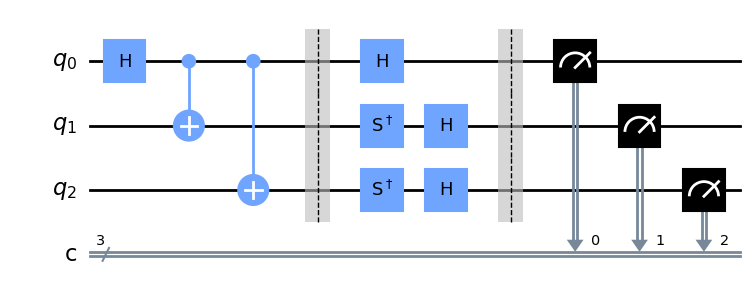

In [12]:
rst = '011'

qc = QuantumCircuit(3, 3)

qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.barrier()

for i in range(3):
    if rst[i] == '1':
        qc.sdg(i)

    qc.h(i)

qc.barrier()

for i in range(3):
    qc.measure(i, i)

qc.draw('mpl')


In [13]:
sim = Aer.get_backend('aer_simulator')
counts = sim.run(qc).result().get_counts()
print(counts)

for abc, shots in counts.items():
    count = 0
    for i in range(3):
        if abc[i] == '1': 
            count+=1
    print("abc = ", abc, ", a ^ b ^ c = ", count%2 , " : ", shots)

{'001': 273, '111': 258, '010': 251, '100': 242}
abc =  001 , a ^ b ^ c =  1  :  273
abc =  111 , a ^ b ^ c =  1  :  258
abc =  010 , a ^ b ^ c =  1  :  251
abc =  100 , a ^ b ^ c =  1  :  242
